In [29]:
import pandas as pd
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/Users/ruslanhuretski/Downloads/games.csv')

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(16291, 11)

In [9]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [10]:
df.Platform.value_counts(normalize=True)

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
PSP     0.073476
PS      0.072985
PC      0.057578
XB      0.049291
GBA     0.048247
GC      0.033270
3DS     0.030630
PSV     0.025167
PS4     0.020625
N64     0.019397
SNES    0.014671
XOne    0.013075
SAT     0.010619
WiiU    0.008778
2600    0.007120
NES     0.006016
GB      0.005954
DC      0.003192
GEN     0.001657
NG      0.000737
SCD     0.000368
WS      0.000368
3DO     0.000184
TG16    0.000123
GG      0.000061
PCFX    0.000061
Name: Platform, dtype: float64

In [11]:
df.Platform.describe()

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

In [12]:
df.Publisher.describe()

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

In [13]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [14]:
df_nintendo = df.query('Publisher == "Nintendo"')

In [15]:
df_nintendo.NA_Sales.describe()

count    696.000000
mean       1.172055
std        2.989913
min        0.000000
25%        0.010000
50%        0.375000
75%        0.972500
max       41.490000
Name: NA_Sales, dtype: float64

In [16]:
df_nintendo.EU_Sales.describe()

count    696.000000
mean       0.601006
std        1.743953
min        0.000000
25%        0.007500
50%        0.120000
75%        0.482500
max       29.020000
Name: EU_Sales, dtype: float64

In [17]:
df_nintendo.JP_Sales.describe()

count    696.000000
mean       0.653721
std        1.063110
min        0.000000
25%        0.090000
50%        0.280000
75%        0.740000
max       10.220000
Name: JP_Sales, dtype: float64

In [18]:
df_nintendo.Other_Sales.describe()

count    696.000000
mean       0.136767
std        0.464170
min        0.000000
25%        0.000000
50%        0.030000
75%        0.090000
max        8.460000
Name: Other_Sales, dtype: float64

In [19]:
df_nintendo.Global_Sales.describe()

count    696.000000
mean       2.563836
std        5.676925
min        0.010000
25%        0.300000
50%        0.920000
75%        2.262500
max       82.740000
Name: Global_Sales, dtype: float64

In [20]:
df_nintendo['NA_Sales'].agg(['mean', 'median', 'std'])

mean      1.172055
median    0.375000
std       2.989913
Name: NA_Sales, dtype: float64

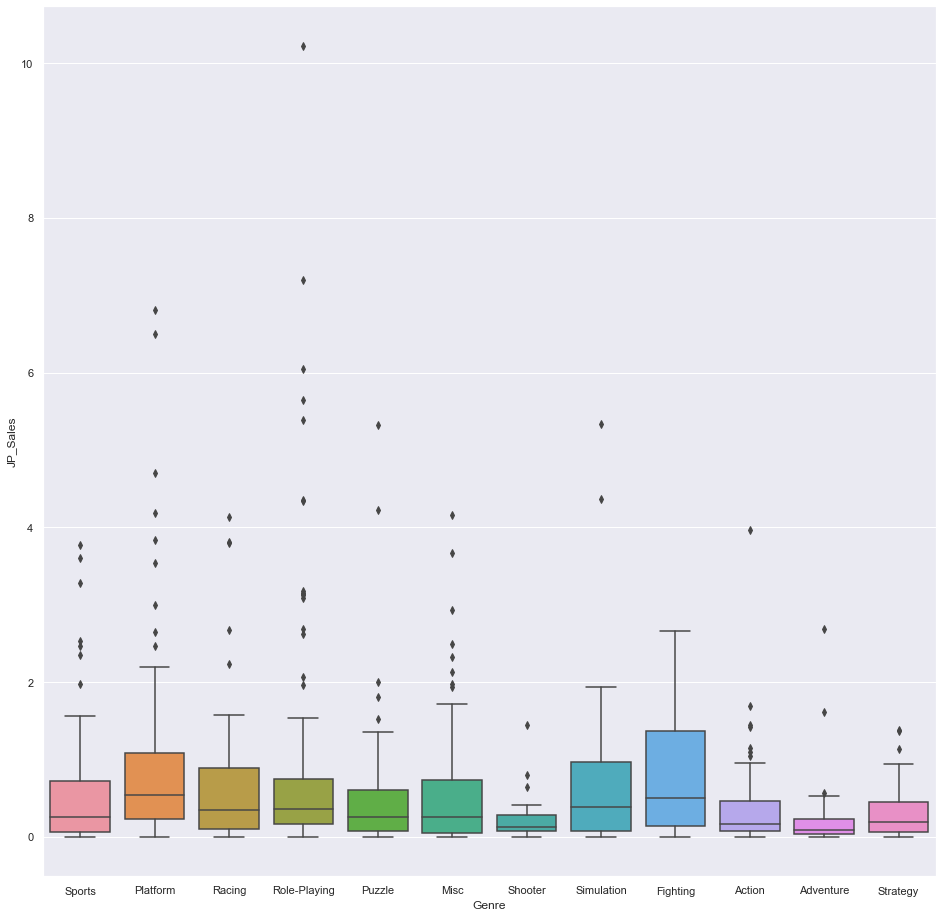

In [40]:
sns.boxplot(x='Genre', y='JP_Sales', data=df_nintendo)
sns.set(rc={'figure.figsize':(16,26)})

In [67]:
df_nintendo_year = df_nintendo.query('Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")') \
                                .groupby(['Genre', 'Year'], as_index=False) \
                                .agg({'Global_Sales': sum})                           

In [68]:
df_nintendo_year

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55
...,...,...,...
109,Sports,2010.0,2.18
110,Sports,2012.0,1.05
111,Sports,2013.0,1.69
112,Sports,2014.0,0.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

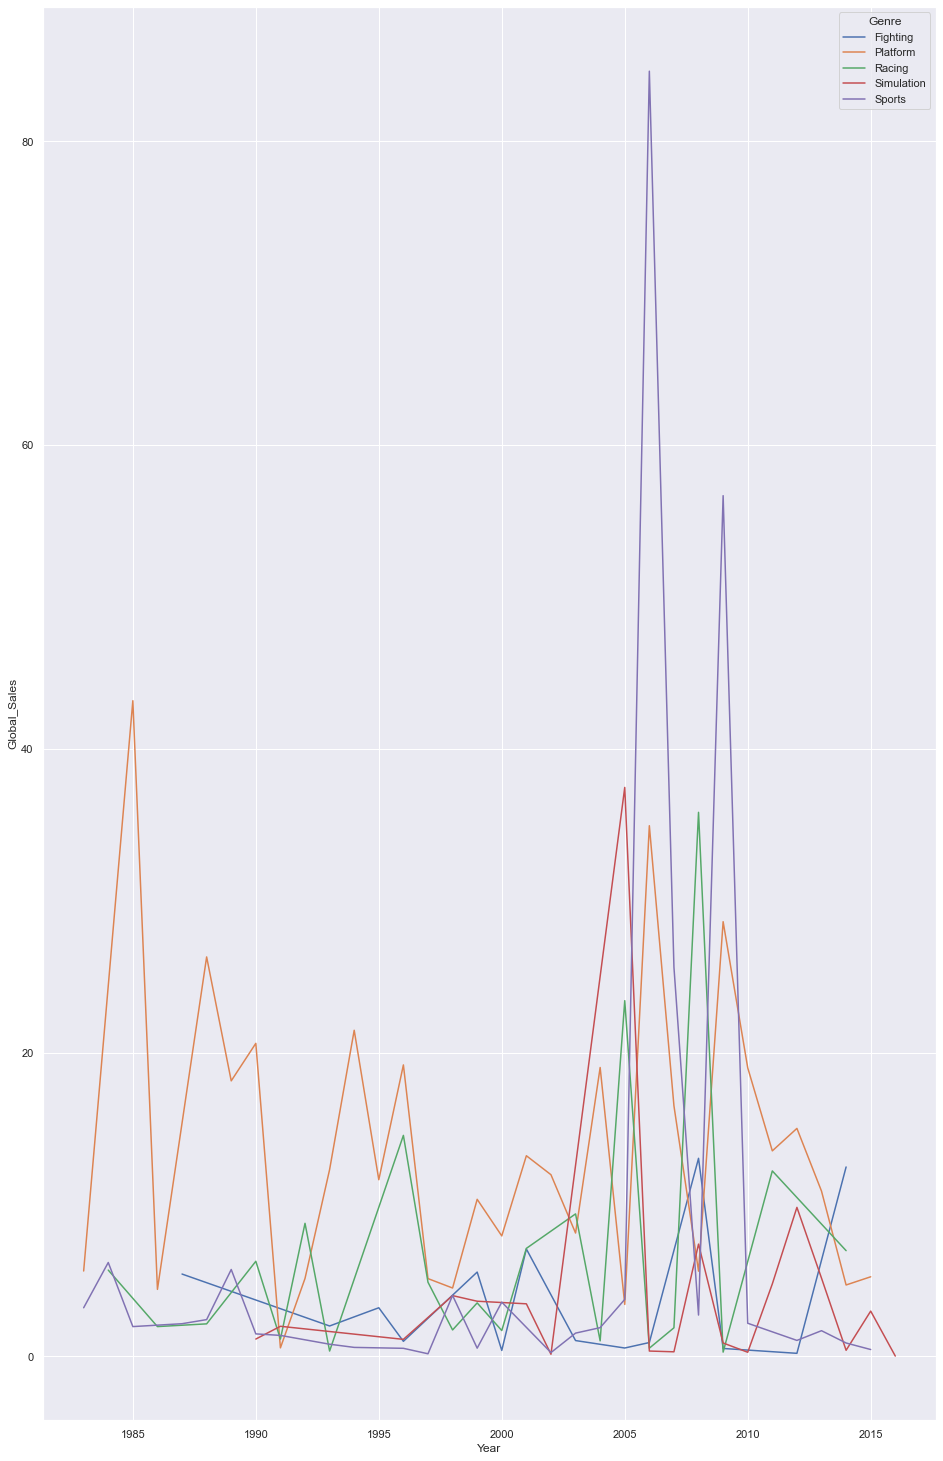

In [69]:
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=df_nintendo_year)


In [64]:
df_nintendo_sport = df_nintendo.query('Genre == "Sports"') \
                                .groupby(['Genre', 'Year'], as_index=False) \
                                .agg({'Global_Sales': sum})

In [65]:
df_nintendo_sport

,Genre,Year,Global_Sales
0,Sports,1983.0,3.20
1,Sports,1984.0,6.18
2,Sports,1985.0,1.96
3,Sports,1987.0,2.15
4,Sports,1988.0,2.42
5,Sports,1989.0,5.72
6,Sports,1990.0,1.48
7,Sports,1991.0,1.38
8,Sports,1993.0,0.80
9,Sports,1994.0,0.59


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

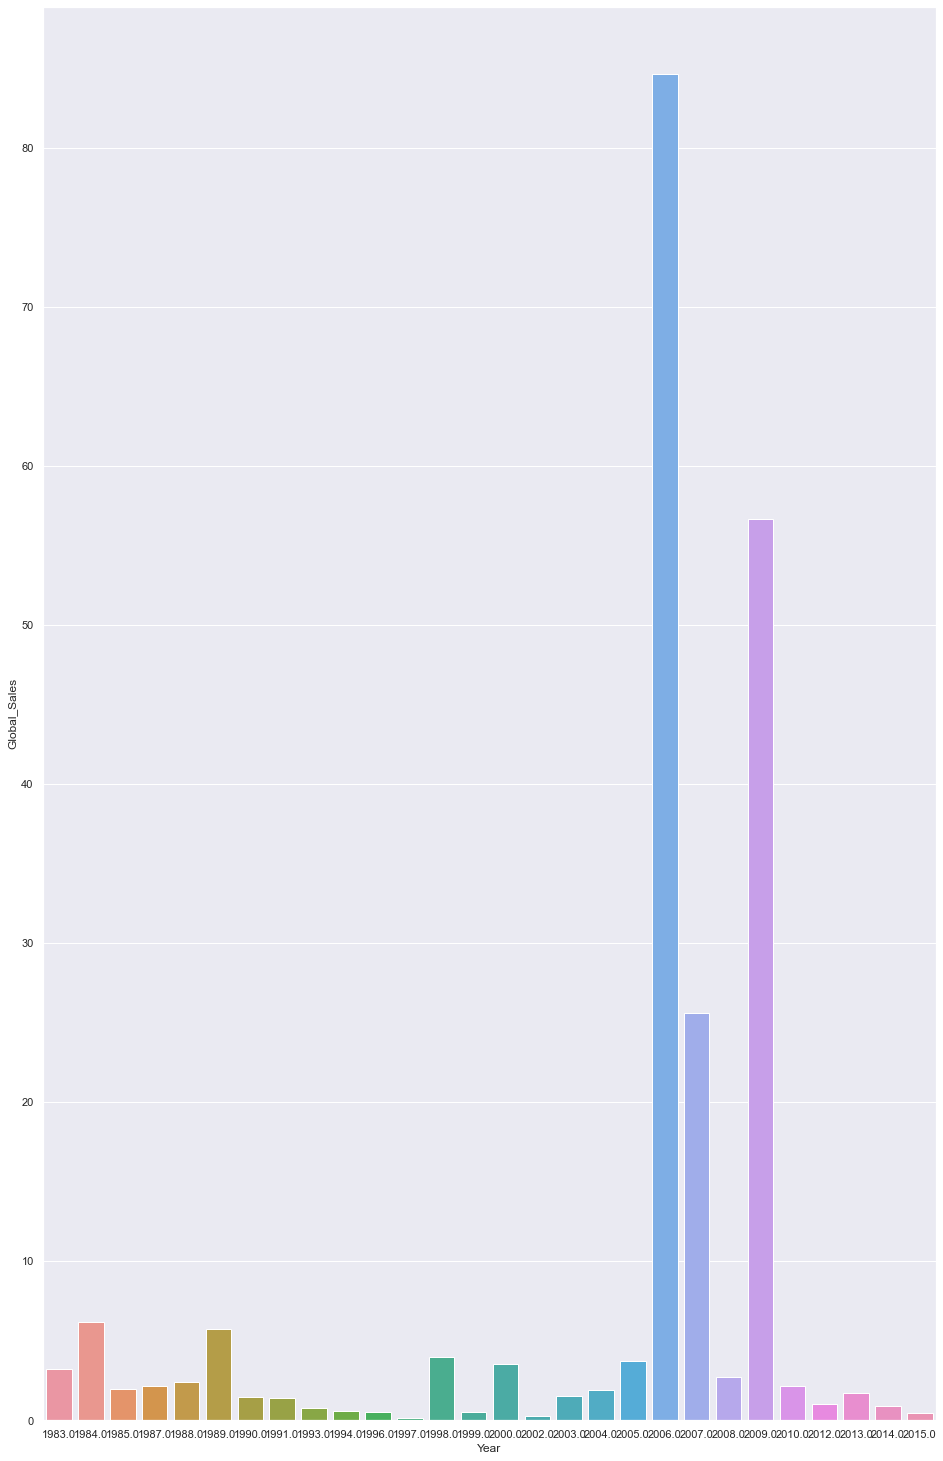

In [66]:
sns.barplot(x='Year', y='Global_Sales', data=df_nintendo_sport)